In [1]:
import pandas as pd
import string
from nltk.corpus import stopwords
import re
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as se
import numpy as np

In [2]:
ds=pd.read_csv(r"D:\NLP project\OurDataset.csv")

In [3]:
ds['cleaned']=ds['Text']
ds['cleaned'] = ds['cleaned'].str.lower()

In [4]:
def remove_punc(text):
    punc=string.punctuation+'؛،؟'#for arabic punctuation 
    return text.translate(str.maketrans('','',punc))

In [5]:
ds['cleaned']=ds['cleaned'].apply(lambda x:remove_punc(x))

In [6]:
languages =set(ds['Language'])#for get the values of the languages without repeat 
print(languages)

{'Hindi', 'Dutch', 'Turkish', 'Spanish', 'German', 'Arabic', 'Russian', 'Tamil', 'Danish', 'Italian', 'English', 'Portugeese', 'Kannada', 'Greek', 'French', 'Sweedish', 'Malayalam'}


In [7]:
def remove_stopwords (text):
    stop_word= stopwords.words()
    return " " .join (word for word in text.split() if not word in stop_word)

ds['cleaned']=ds['cleaned'].apply(lambda x:remove_stopwords(x))


In [8]:
ds.head(10)

,Text,Language,cleaned
0,"Nature, in the broadest sense, is the natural...",English,nature broadest natural physical material worl...
1,"""Nature"" can refer to the phenomena of the phy...",English,nature refer phenomena physical world life gen...
2,"The study of nature is a large, if not the onl...",English,study nature large part science
3,"Although humans are part of nature, human acti...",English,humans part nature human activity understood s...
4,[1] The word nature is borrowed from the Old F...,English,1 word nature borrowed french nature derived l...
5,"[2] In ancient philosophy, natura is mostly us...",English,2 ancient philosophy natura latin translation ...
6,"[3][4] \r\nThe concept of nature as a whole, t...",English,34 concept nature physical universe expansions...
7,During the advent of modern scientific method ...,English,advent modern scientific method centuries natu...
8,"[5][6] With the Industrial revolution, nature ...",English,56 industrial revolution nature increasingly p...
9,"However, a vitalist vision of nature, closer t...",English,vitalist vision nature closer presocratic rebo...


In [9]:
def remove_digits(text):
    text=re.sub(r'[0-9]',' ',text)
    return text
ds['cleaned']=ds['cleaned'].apply(lambda x:remove_digits(x))

In [10]:
ds.head(10)

,Text,Language,cleaned
0,"Nature, in the broadest sense, is the natural...",English,nature broadest natural physical material worl...
1,"""Nature"" can refer to the phenomena of the phy...",English,nature refer phenomena physical world life gen...
2,"The study of nature is a large, if not the onl...",English,study nature large part science
3,"Although humans are part of nature, human acti...",English,humans part nature human activity understood s...
4,[1] The word nature is borrowed from the Old F...,English,word nature borrowed french nature derived l...
5,"[2] In ancient philosophy, natura is mostly us...",English,ancient philosophy natura latin translation ...
6,"[3][4] \r\nThe concept of nature as a whole, t...",English,concept nature physical universe expansions...
7,During the advent of modern scientific method ...,English,advent modern scientific method centuries natu...
8,"[5][6] With the Industrial revolution, nature ...",English,industrial revolution nature increasingly p...
9,"However, a vitalist vision of nature, closer t...",English,vitalist vision nature closer presocratic rebo...


In [11]:
lemm=WordNetLemmatizer()
def lemmiti(text):
    txt = text.split()
   
    return " ".join([lemm.lemmatize (x,pos='v')for x in txt])
ds['cleaned'] = ds['cleaned'].apply(lambda x: lemmiti(x))

In [12]:
ds.head(9497)

,Text,Language,cleaned
0,"Nature, in the broadest sense, is the natural...",English,nature broadest natural physical material worl...
1,"""Nature"" can refer to the phenomena of the phy...",English,nature refer phenomena physical world life gen...
2,"The study of nature is a large, if not the onl...",English,study nature large part science
3,"Although humans are part of nature, human acti...",English,humans part nature human activity understand s...
4,[1] The word nature is borrowed from the Old F...,English,word nature borrow french nature derive latin ...
...,...,...,...
9492,لقد كان وسيمًا ولم يهتم بي على الإطلاق ولكن عز...,Arabic,لقد وسيمًا ولم يهتم الإطلاق عزيزي تدرك الطريقة...
9493,ما هو خطأك ، فلنطعمك شيئًا لطيفًا من ذلك اليوم...,Arabic,خطأك فلنطعمك شيئًا لطيفًا اليوم فصاعدًا
9494,غيرت narcisa طرقها التي كافحت في البداية ولكن ...,Arabic,غيرت narcisa طرقها كافحت البداية ببطء وصبر بدأ...
9495,كيف' أخبرتهم النرجسية الآن ماريان بكل ما حدث و...,Arabic,أخبرتهم النرجسية ماريان بكل حدث وتغيرت كثيرًا ...


In [13]:
st=PorterStemmer()
def stemming(text):
    txt = text.split()

    return " ".join([st.stem (x)for x in txt])
ds['cleaned'] = ds['cleaned'].apply(lambda x: stemming(x))


In [14]:
ds.head(9500)

,Text,Language,cleaned
0,"Nature, in the broadest sense, is the natural...",English,natur broadest natur physic materi world univers
1,"""Nature"" can refer to the phenomena of the phy...",English,natur refer phenomena physic world life gener
2,"The study of nature is a large, if not the onl...",English,studi natur larg part scienc
3,"Although humans are part of nature, human acti...",English,human part natur human activ understand separ ...
4,[1] The word nature is borrowed from the Old F...,English,word natur borrow french natur deriv latin wor...
...,...,...,...
9495,كيف' أخبرتهم النرجسية الآن ماريان بكل ما حدث و...,Arabic,أخبرتهم النرجسية ماريان بكل حدث وتغيرت كثيرًا ...
9496,هل أعتقد أنها لن تريد المزيد من الخبز الذهبي ا...,Arabic,أعتقد أنها تريد المزيد الخبز الذهبي هاه تعلمون
9497,تيري تبدو في الواقع مثل هذا الملاك قليلاً على ...,Arabic,تيري تبدو الواقع الملاك قليلاً الرغم أراه يمكن...
9498,.Wir sind alle auf der Suche nach schnellen We...,German,such schnellen wegen fließend englisch sprechen


In [15]:
reg_tag=re.compile(r'<[^>]+>')
def remove_tags(text):
    text=re.sub(reg_tag,'',text)
    return text
ds['cleaned'] = ds['cleaned'].apply(lambda x: remove_tags(x))

In [16]:
def remove_special_cahr (text):
    text =re.sub('£$%^&*',' ',text)
    #text=re.sub('\s+',' ',text)
    return text
ds['cleaned']=ds['cleaned'].apply(lambda x:remove_special_cahr(x))

In [17]:
ds

,Text,Language,cleaned
0,"Nature, in the broadest sense, is the natural...",English,natur broadest natur physic materi world univers
1,"""Nature"" can refer to the phenomena of the phy...",English,natur refer phenomena physic world life gener
2,"The study of nature is a large, if not the onl...",English,studi natur larg part scienc
3,"Although humans are part of nature, human acti...",English,human part natur human activ understand separ ...
4,[1] The word nature is borrowed from the Old F...,English,word natur borrow french natur deriv latin wor...
...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,ಹೇಗೆ ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎಲ್...
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...


In [18]:
ds['Text'][9493]

'ما هو خطأك ، فلنطعمك شيئًا لطيفًا من ذلك اليوم فصاعدًا.'

In [19]:
ds['cleaned'][9493]

'خطأك فلنطعمك شيئًا لطيفًا اليوم فصاعدًا'

In [20]:
ds['Language'].value_counts()

Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64

In [21]:
x=ds["cleaned"]
y=ds["Language"]

In [22]:
cv = CountVectorizer()                        # Creating an instance of CountVectorizer
z = cv.fit_transform(x)               # Transforming the preprocessed text into a bag of words model
z.shape                                      # Displaying the shape of the transformed data

(10337, 34647)

In [23]:
from sklearn.preprocessing import LabelEncoder
label= LabelEncoder()
y= label.fit_transform(ds["Language"])

In [24]:
y

array([3, 3, 3, ..., 9, 9, 9])

## split data into training,testing

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(z, y, test_size=0.2,random_state=5)


## scaling

In [26]:
from sklearn.preprocessing import StandardScaler #[-1,1]
sc=StandardScaler(with_mean=False)
x_train=sc.fit_transform(X_train)
x_test=sc.fit_transform(X_test)


## naive bayes

In [27]:
from sklearn.naive_bayes import ComplementNB

x_train_array = x_train.toarray()
x_test_array = x_test.toarray()

classifier=ComplementNB()
classifier.fit(x_train_array,y_train)
y_pred=classifier.predict(x_test_array)
y_pred






array([11, 11,  4, ..., 13,  2, 14])

In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print("accuarcy is : ",ac)
print(cm,"\n ",cr)


accuarcy is :  0.9356866537717602
[[ 96   0   0   0   0   0   0   9   0   0   0   0   0   0   0   0   0]
 [  2  74   0   1   0   1   0   8   0   0   0   1   0   0   2   0   0]
 [  0   0 112   2   0   1   0   4   1   0   0   0   0   0   0   0   0]
 [  9   2   0 264   0   0   0   1   0   0   0   2   0   3   1   0   0]
 [  1   0   0   2 212   0   0   4   0   0   0   0   0   0   0   0   0]
 [  1   0   0   1   0  77   0   3   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  83   4   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  12   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   4 126   0   0   2   0   1   0   0   0]
 [  5   0   0   0   0   0   0   0   0  72   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0 118   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   1   0   0 137   0   9   0   0   0]
 [  1   0   0   1   0   0   0   6   0   0   0   0 117   0   0   0   0]
 [  0   0   0   2   0   0   0   6   0   0  

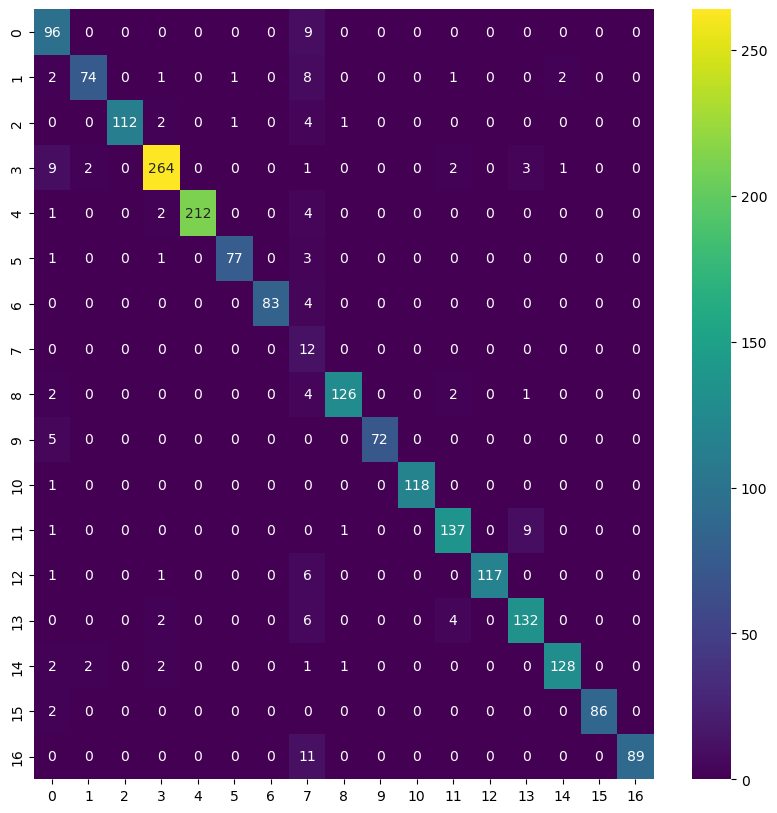

In [29]:
plt.figure(figsize=(10,10))
se.heatmap(cm, annot = True,fmt='d', cmap='viridis') #fmt -> floor number to it's integer form (3.5 -> 3)
plt.show()

# Prediction vs Actual

In [30]:
conf_df = pd.DataFrame(np.c_[y_test , y_pred] , columns=['actual' , 'prediction'])
conf_df.head(25)

,actual,prediction
0,11,11
1,11,11
2,4,4
3,3,3
4,6,6
5,6,6
6,16,16
7,3,3
8,10,10
9,6,6


In [31]:
def predict(text):
    z = cv.transform([text])
    z_dense = z.toarray()  # Convert sparse matrix to dense array
    lang = classifier.predict(z_dense)
    lang = label.inverse_transform(lang)
    print("the language is:", lang[0])

In [32]:
predict("احمد يذهب الي المدرسة يوميا ")

the language is: Arabic


In [33]:
predict("he goes to school every day ")

the language is: English


In [34]:
predict("ಅವನು ಪ್ರತಿ ವಾರ ಶಾಲೆಗೆ ಹೋಗುತ್ತಾನೆ ")

the language is: Kannada


In [35]:
predict("वह हर सप्ताह स्कूल जाता है ")

the language is: Hindi


In [36]:
predict("il va à l'école chaque semaine")

the language is: Italian


In [37]:
predict("han går till skolan varje vecka")

the language is: Sweedish


In [38]:
predict("ele vai para a escola toda semana")

the language is: Portugeese


In [39]:
predict("н ходит в школу каждую неделю")

the language is: Russian


In [40]:
predict("o her hafta okula gider")

the language is: Turkish


In [41]:
predict("അവൻ എല്ലാ ആഴ്ചയും സ്കൂളിൽ പോകുന്നു")

the language is: Malayalam


In [42]:
predict("va a scuola ogni settimana")

the language is: Italian


In [43]:
predict("De beste manier om dit te doen")

the language is: Dutch


In [44]:
predict("Han går i skole hver uge klokken syv om morgenen og spiser kartofler")

the language is: Danish


In [45]:
predict("Er geht jede Woche zur Schule")

the language is: German


In [46]:
predict("வாரந்தோறும் பள்ளிக்கு செல்வார்")

the language is: Tamil


In [47]:
predict("  السلام عليكم")

the language is: Arabic


In [48]:
predict("مرحبا")

the language is: Arabic


In [49]:
predict("الله اكبر كبيرا")

the language is: Arabic


In [50]:
predict("Entchuldigung wie bitte frau")

the language is: German


In [53]:
from joblib import dump

# Assuming your model is named 'model'
dump(classifier, 'D:\\NLP project\\pp.joblib')


['D:\\NLP project\\pp.joblib']